# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [45]:
%matplotlib inline
%pprint off

from __future__ import print_function, division
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.transform import rescale

Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

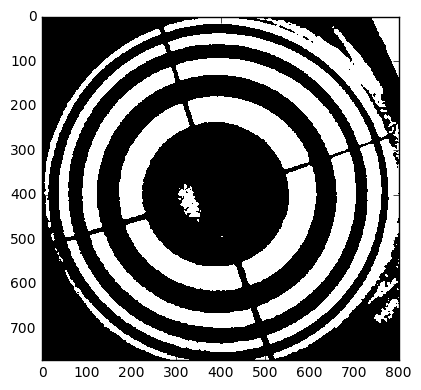

In [5]:
# Reading the image 
img_path = './images/'
FindingContours_im = io.imread(img_path.__add__('FindingContours.png'))
io.imshow(FindingContours_im)


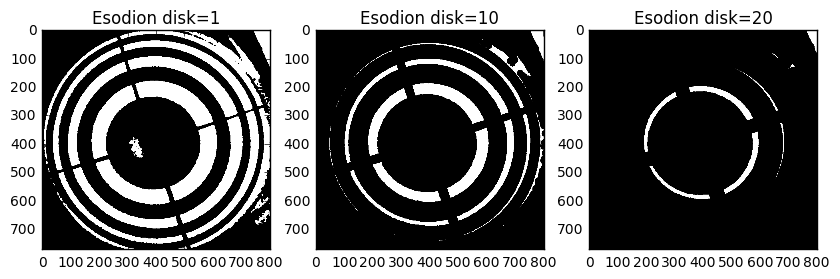

In [6]:
from skimage.morphology import disk
from skimage.morphology import erosion
# Applying erosion 
Erode1= erosion(FindingContours_im, disk(1))
Erode10= erosion(FindingContours_im, disk(10))
Erode20= erosion(FindingContours_im, disk(20))

# Subplot the all the images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2 = axes.ravel()

# Show the lena image and its histogram 
ax0.imshow(Erode1,cmap=cm.Greys_r)
ax0.set_title('Esodion disk=1') 
ax1.imshow(Erode10,cmap=cm.Greys_r)
ax1.set_title('Esodion disk=10')
ax2.imshow(Erode20,cmap=cm.Greys_r)
ax2.set_title('Esodion disk=20')


** Q.1.2 Dilation **

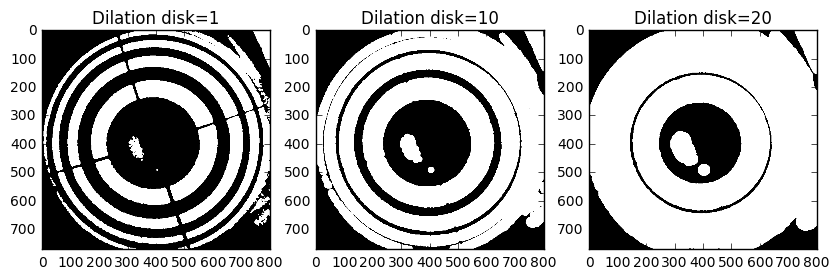

In [7]:
from skimage.morphology import dilation
# Applying Dilation
Dilate1= dilation(FindingContours_im, disk(1))
Dilate10= dilation(FindingContours_im, disk(10))
Dilate20= dilation(FindingContours_im, disk(20))

# Subplot the all the images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2 = axes.ravel()

# Show the  images 
ax0.imshow(Dilate1,cmap=cm.Greys_r)
ax0.set_title('Dilation disk=1') 
ax1.imshow(Dilate10,cmap=cm.Greys_r)
ax1.set_title('Dilation disk=10')
ax2.imshow(Dilate20,cmap=cm.Greys_r)
ax2.set_title('Dilation disk=20')



** Q.1.3 Opening **

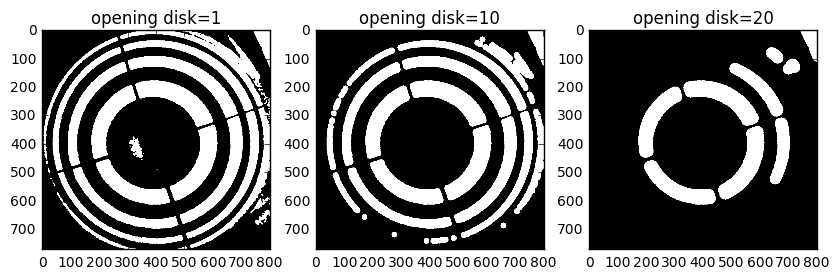

In [8]:
from skimage.morphology import opening
# Applying opening
open1= opening(FindingContours_im, disk(1))
open10= opening(FindingContours_im, disk(10))
open20= opening(FindingContours_im, disk(20))

# Subplot the all the images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2 = axes.ravel()

# Show the  images 
ax0.imshow(open1,cmap=cm.Greys_r)
ax0.set_title('opening disk=1') 
ax1.imshow(open10,cmap=cm.Greys_r)
ax1.set_title('opening disk=10')
ax2.imshow(open20,cmap=cm.Greys_r)
ax2.set_title('opening disk=20')


** Q.1.4 Closing**

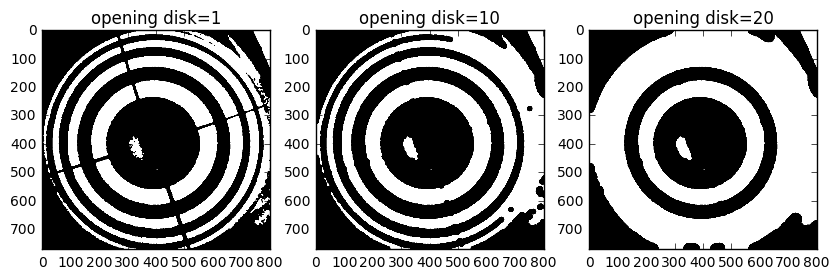

In [9]:
from skimage.morphology import closing
# Applying closing
close1= closing(FindingContours_im, disk(1))
close10= closing(FindingContours_im, disk(10))
close20= closing(FindingContours_im, disk(20))

# Subplot the all the images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2 = axes.ravel()

# Show the  images 
ax0.imshow(close1,cmap=cm.Greys_r)
ax0.set_title('opening disk=1') 
ax1.imshow(close10,cmap=cm.Greys_r)
ax1.set_title('opening disk=10')
ax2.imshow(close20,cmap=cm.Greys_r)
ax2.set_title('opening disk=20')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

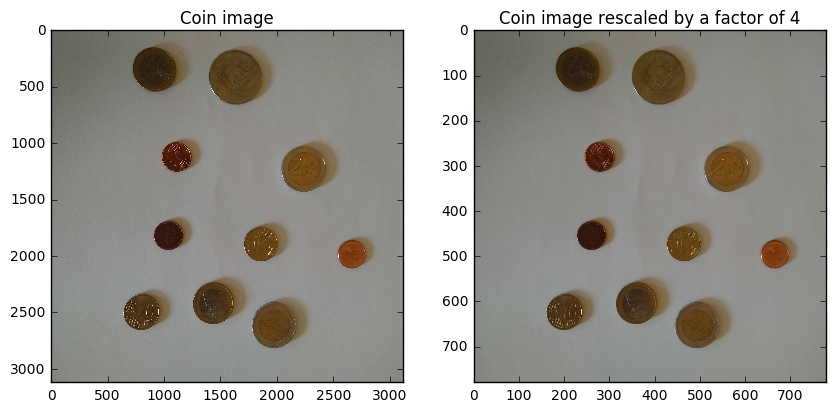

In [10]:
#Reading the coin image
Coin_im = img_as_ubyte(io.imread(img_path.__add__('coins.jpg')))

# Reading the image as ubyte and divide the scale of the image by a factor of 4
Coin_rescaled = rescale(Coin_im,0.25)

# Subplot the all the images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax0, ax1 = axes.ravel()

# Show the  images 
ax0.imshow(Coin_im,cmap=cm.Greys_r)
ax0.set_title('Coin image') 
ax1.imshow(Coin_rescaled,cmap=cm.Greys_r)
ax1.set_title('Coin image rescaled by a factor of 4')


**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

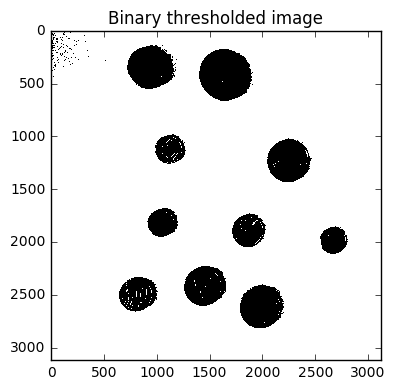

In [35]:
from skimage import filters
from skimage.filters import threshold_otsu
#Convert the image in gray scale 
Coin_grey = rgb2gray(Coin_im)
io.imshow(Coin_grey)
plt.title('Grayscale image'
         )
#Apply Otsu's thresolding 
threshold_otsu = threshold_otsu(Coin_grey)
Coin_threshold  = Coin_grey >= threshold_otsu

#display the binary image 
io.imshow(Coin_threshold)
plt.title('Binary thresholded image')

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

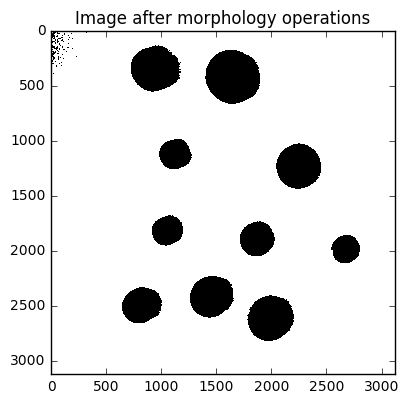

In [36]:
# Applying opening on the thresholded image
clean = closing(Coin_threshold , disk(1))
clean = opening(clean , disk(5))
clean1 = closing(clean , disk(3))

plt.figure()
imshow(clean)
plt.title('Image after morphology operations')


**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`



Region  0
Region is not a coin as it is not circular.

Region  1
Radius: 4.58349784424
Center: (3.1515151515151514, 94.575757575757578)

Region  2
Radius: 6.07650777975
Center: (3.4741379310344827, 116.17241379310344)

Region  3
Radius: 9.14961748197
Center: (9.2319391634980992, 150.84790874524714)

Region  4
Region is not a coin as it is not circular.

Region  5
Region is not a coin as it is not circular.

Region  6
Region is not a coin as it is not circular.

Region  7
Radius: 5.44084730672
Center: (89.096774193548384, 154.7741935483871)

Region  8
Region is not a coin as it is not circular.

Region  9
Radius: 213.804032808
Center: (350.38480178818872, 942.72430697240429)

Region  10
Radius: 6.50655168753
Center: (155.47368421052633, 100.37593984962406)

Region  11
Radius: 5.86323014284
Center: (157.39814814814815, 150.08333333333334)

Region  12
Radius: 3.38513750129
Center: (168.5, 74.0)

Region  13
Radius: 4.8204379149
Center: (175.78082191780823, 121.0)

Region  14
Radius: 246.4

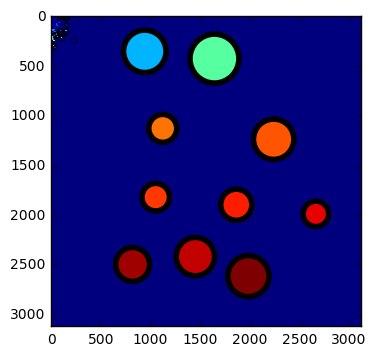

In [37]:
[coins_labelled, regions] = label(clean1, background=1, return_num=True )

coins_properties = regionprops(coins_labelled)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(coins_labelled)

no_of_coins = 0
for i in range(len(coins_properties)):
    print('\nRegion ', i)
    
    radius = coins_properties[i].equivalent_diameter/2
    center = coins_properties[i].centroid 
    axis_lenth = coins_properties[i].major_axis_length
    
    if axis_lenth < 3*radius:
        no_of_coins += 1
        print('Radius:',radius)
        print('Center:', center)
        circle = plt.Circle((center[1], center[0]), radius, color='k', linewidth='4', fill=False)
        ax.add_patch(circle)
    else:
        print('Region is not a coin as it is not circular.')
        
print('\nNumber of regions identified:',regions)
print('Number of coins:', no_of_coins)

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

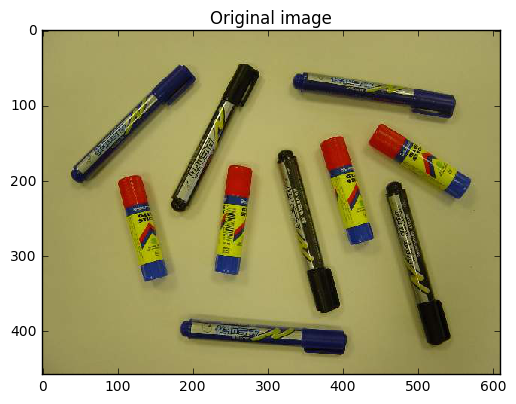

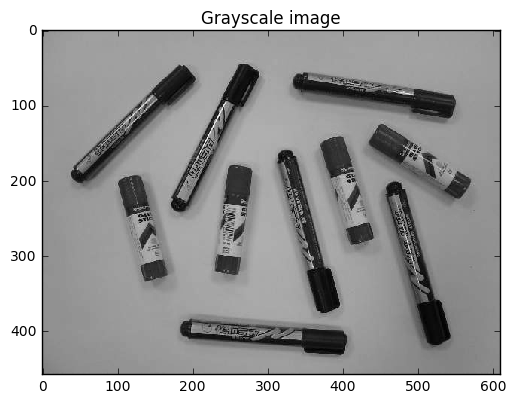

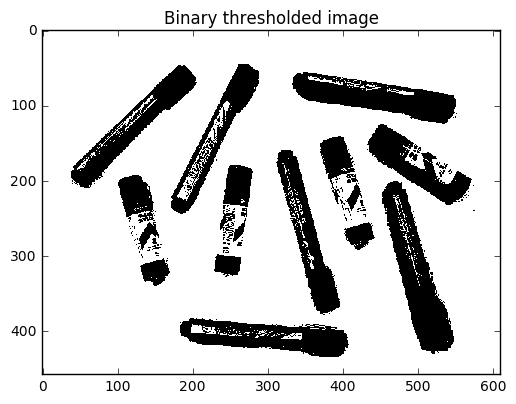

In [46]:
img_objects = imread('./images/objets4.jpg')
img_objects = img_as_ubyte(img_objects)
plt.figure()
imshow(img_objects)
plt.title('Original image')

img_objects_gray = rgb2gray(img_objects)
plt.figure()
imshow(img_objects_gray)
plt.title('Grayscale image')

img_objects_bw = img_objects_gray >= threshold_otsu(Coin_grey)+0.1
plt.figure()
imshow(img_objects_bw)
plt.title('Binary thresholded image')

The image contains more graylevels and so we apply the morphology operation first on the grayscale image and then binarize the image.


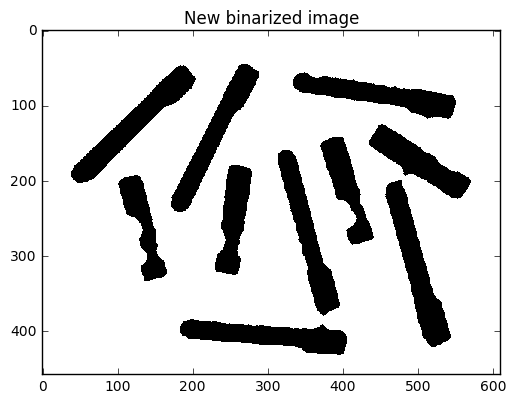

In [47]:
from skimage.morphology import closing, opening

print('The image contains more graylevels and so we apply the morphology operation first on the grayscale image and then binarize the image.')
img_objects_opened = opening(img_objects_gray, disk(12))
img_objects_closed = closing(img_objects_opened, disk(3))

img_objects_bw = img_objects_closed >= threshold_otsu(img_objects_closed)

plt.figure()
imshow(img_objects_bw)
plt.title('New binarized image')

Eccentricity is used to distinguish pens from gums because gums are smaller and thicker when compared to pens and have less eccentricity. 

Region  0
Eccentricity: 0.992278149755

Region  1
Eccentricity: 0.990179709589

Region  2
Eccentricity: 0.991940098173

Region  3
Eccentricity: 0.970999759747

Region  4
Eccentricity: 0.978005586861

Region  5
Eccentricity: 0.992899048772

Region  6
Eccentricity: 0.978458207605

Region  7
Eccentricity: 0.980718900039

Region  8
Eccentricity: 0.991349853742

Region  9
Eccentricity: 0.99224090111

Number of objects detected: 10
Number of pens: 6
Number of glues: 4


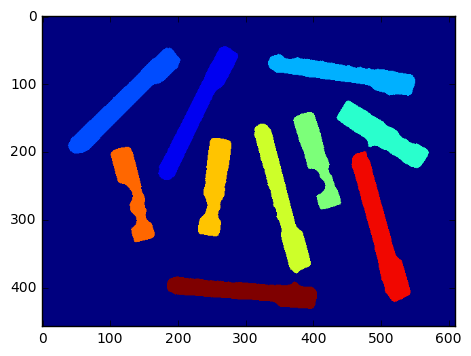

In [48]:
[img_objects_labelled, regions] = label(img_objects_bw, background=1, return_num=True )

img_objects_properties = regionprops(img_objects_labelled)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(img_objects_labelled)

no_regions = 0
no_pens = 0
no_glues = 0

print('Eccentricity is used to distinguish pens from gums because gums are smaller and thicker when compared to pens and have less eccentricity. ')

for i in range(len(img_objects_properties)):
    print('\nRegion ', i)
    
    eccentricity = img_objects_properties[i].eccentricity
    print('Eccentricity:',eccentricity)
    
    no_regions = no_regions + 1
    if eccentricity > 0.99:
        no_pens = no_pens + 1
    elif eccentricity > 0.95:
        no_glues = no_glues + 1
    
        
print('\nNumber of objects detected:', no_regions)        
print('Number of pens:',no_pens)
print('Number of glues:', no_glues)